In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mirella Glowinska C00275764

Dataset source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Telco-Customer-Churn.csv')

print("------------------------------------------------------------------------------")
print("First 5 rows of the dataset:")
print(df.head())
print("------------------------------------------------------------------------------")
# (rows, columns)
print(f"Shape of dataset: {df.shape}")
print("------------------------------------------------------------------------------")
print("Minimum values:")
print(df.min(numeric_only=True))
print("------------------------------------------------------------------------------")
print("\nMaximum values:")
print(df.max(numeric_only=True))
print("------------------------------------------------------------------------------")
print(df.describe())
print("------------------------------------------------------------------------------")
print("Columns:", df.columns.tolist())


------------------------------------------------------------------------------
First 5 rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber o

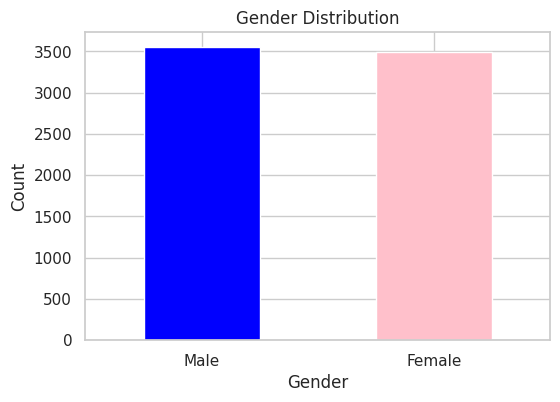

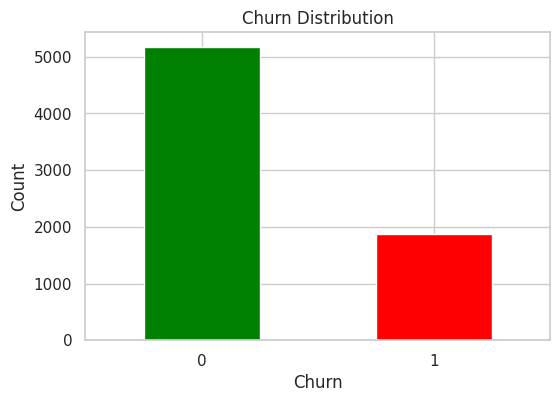

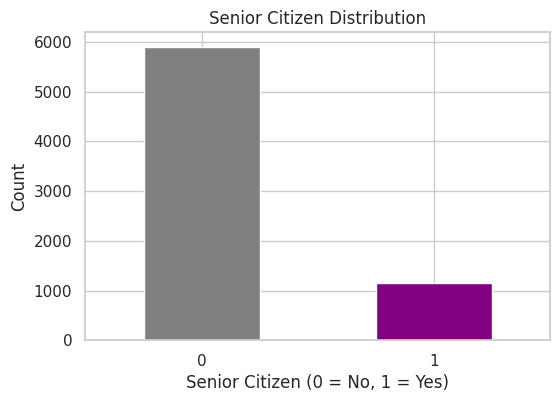

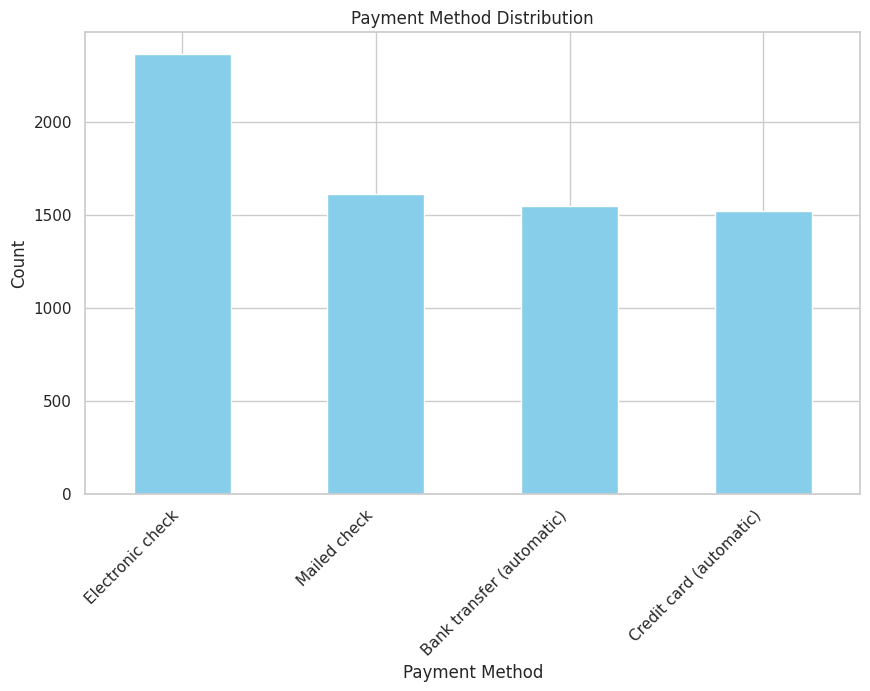

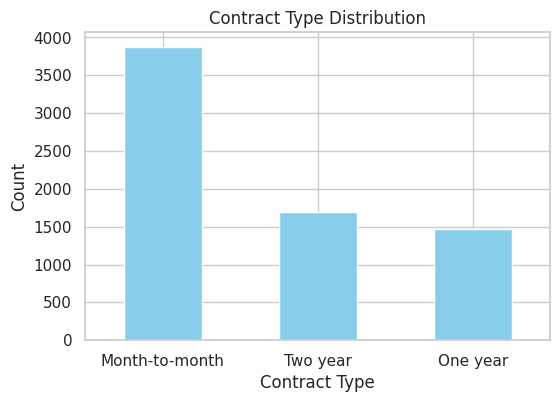

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

gender_counts = df['gender'].value_counts()

plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(6, 4))
churn_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

senior_citizen_counts = df['SeniorCitizen'].value_counts()
plt.figure(figsize=(6, 4))
senior_citizen_counts.plot(kind='bar', color=['grey', 'purple'])
plt.title('Senior Citizen Distribution')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

payment_method_counts = df['PaymentMethod'].value_counts()
plt.figure(figsize=(10, 6))
payment_method_counts.plot(kind='bar', color='skyblue')
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

contract_counts = df['Contract'].value_counts()
plt.figure(figsize=(6, 4))
contract_counts.plot(kind='bar', color='skyblue')
plt.title('Contract Type Distribution')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

KNN: https://medium.com/@amirm.lavasani/classic-machine-learning-in-python-k-nearest-neighbors-knn-a06fbfaaf80a

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, roc_curve, roc_auc_score,
                             precision_recall_curve, auc)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

#Data Cleaning
df.drop('customerID', axis=1, inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(0, inplace=True)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

numerical_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('pca', PCA(n_components=0.95)),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#Optimization
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

#Evaluation
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


<ipython-input-46-416af0b7d31c>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Accuracy: 0.7452093683463449
Confusion Matrix:
 [[789 246]
 [113 261]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.76      0.81      1035
           1       0.51      0.70      0.59       374

    accuracy                           0.75      1409
   macro avg       0.69      0.73      0.70      1409
weighted avg       0.78      0.75      0.76      1409

